### RETRIEVE DATA

In [1]:
# change the current working directory - use relative references later
import os
import pandas as pd
os.chdir('/home/jovyan/data-512/data-512-final/data-512-final')
# read the state by state data into a dataframe
df_sbs = pd.read_csv('raw_data/NFCS 2018 State Data 190603.csv')

# read the investor data into a dataframe
df_inv = pd.read_csv('raw_data/NFCS 2018 Investor Data 191107.csv')

### Do women participate less?

First, set up the plotting environment.

In [2]:
# import libraries for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# magic code for viewing plots using jupyter notebooks:
%matplotlib inline

Look a the distribution of gender in the data file

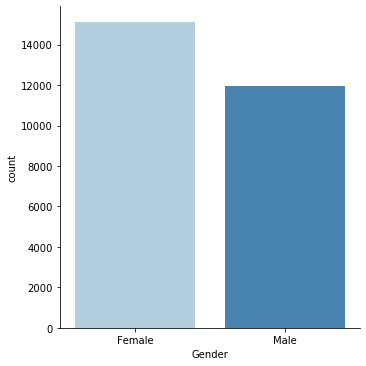

In [4]:
# create a nicer column for gender
df_sbs['Gender'] = df_sbs['A3'].apply(lambda x: 'Male' if x == 1 else 'Female')

# plot the gender distribution
sns.catplot(x="Gender", 
            kind="count", 
            data=df_sbs,
            palette=("Blues"))

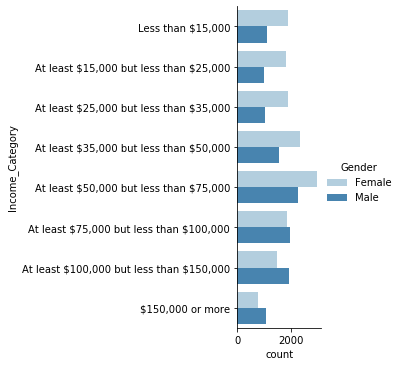

In [5]:
# create a clean column with labels
def income_categories(score):
    switcher = {
        1: "Less than \$15,000",
        2: "At least \$15,000 but less than \$25,000",
        3: "At least \$25,000 but less than \$35,000",
        4: "At least \$35,000 but less than \$50,000",
        5: "At least \$50,000 but less than \$75,000",
        6: "At least \$75,000 but less than \$100,000",
        7: "At least \$100,000 but less than \$150,000",
        8: "\$150,000 or more",
        98: "Unknown",
        99: "Unknown"
    }
    return switcher.get(score, "Unknown")
        
df_sbs['Income_Category'] = df_sbs.apply(lambda x: income_categories(x['A8']),axis=1)

# plot the gender distribution
sns.catplot(y="Income_Category", 
            kind="count", 
            data=df_sbs.sort_values(['A8']),
            hue="Gender",
            palette=("Blues"))

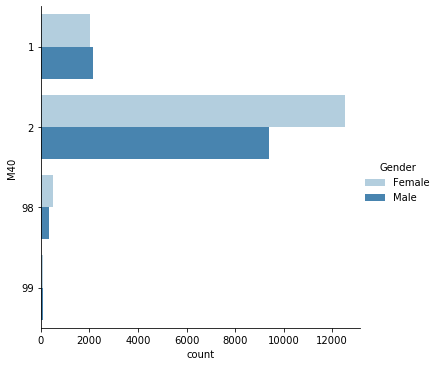

In [47]:
# plot the gender distribution
sns.catplot(y="M40", 
            kind="count", 
            data=df_sbs,
            hue="Gender",
            palette=("Blues"))

In [52]:
df_sbs[(df_sbs['Gender'] =='Male')][['Gender','M20']].value_counts(normalize=True)

Gender  M20
Male    3      0.525845
        2      0.236283
        98     0.129642
        1      0.100284
        99     0.007946
dtype: float64

Text(0.5, 0.98, 'Do you or your spouse hold a retirement account?')

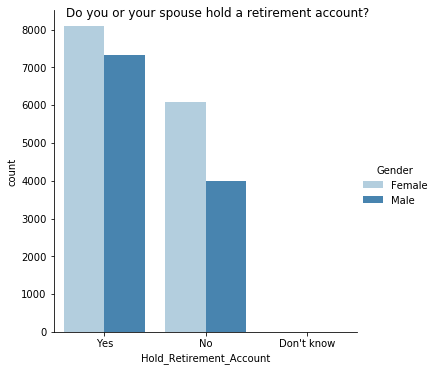

In [7]:
# who has access to an investment account

# create a clean column with labels
def set_investment_accounts(score):
    if score == 1:
        return 'Yes'
    elif score == 2:
        return 'No'
    else:
        return "Unknown"
        
df_sbs['Hold_Retirement_Account'] = df_sbs.apply(lambda x: set_investment_accounts(x['C1_2012']),axis=1)

# plot the gender distribution
g3 = sns.catplot(x="Hold_Retirement_Account", 
            kind="count",
            hue='Gender',
            data=df_sbs,
            order=["Yes", "No", "Don't know"],
            palette=("Blues"))
g3.fig.suptitle('Do you or your spouse hold a retirement account?') 

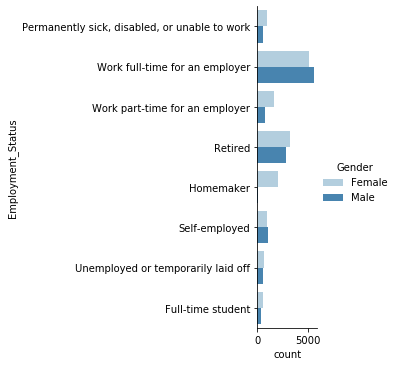

In [8]:
# create a clean column with labels
def set_employment_status(score):
    switcher = {
        1: "Self-employed",
        2: "Work full-time for an employer",
        3: "Work part-time for an employer",
        4: "Homemaker",
        5: "Full-time student",
        6: "Permanently sick, disabled, or unable to work",
        7: "Unemployed or temporarily laid off",
        8: "Retired",
        99: "Unknown"
    }
    return switcher.get(score, "Unknown")
        
df_sbs['Employment_Status'] = df_sbs.apply(lambda x: set_employment_status(x['A9']),axis=1)

# plot the gender distribution
sns.catplot(y="Employment_Status", 
            kind="count", 
            data=df_sbs,
            hue="Gender",
            palette=("Blues"))

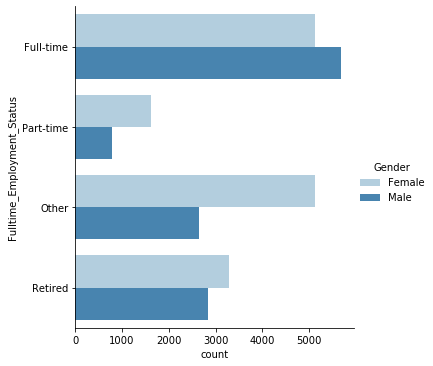

In [9]:
# create a clean column with labels
def set_fulltime_employment_status(score):
    switcher = {
        1: "Other",
        2: "Full-time",
        3: "Part-time",
        4: "Other",
        5: "Other",
        6: "Other",
        7: "Other",
        8: "Retired",
        99: "Unknown"
    }
    return switcher.get(score, "Unknown")
        
df_sbs['Fulltime_Employment_Status'] = df_sbs.apply(lambda x: set_fulltime_employment_status(x['A9']),axis=1)

# plot the gender distribution
sns.catplot(y="Fulltime_Employment_Status", 
            kind="count", 
            data=df_sbs,
            hue="Gender",
            order=["Full-time","Part-time","Other","Retired"],
            palette=("Blues"))

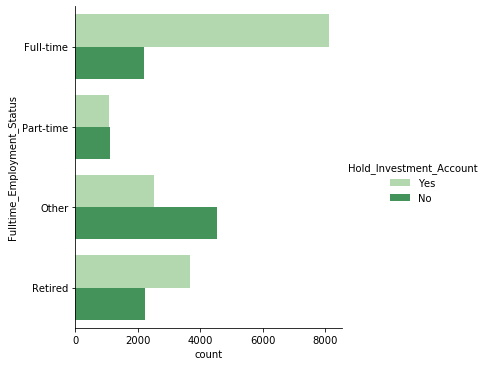

In [73]:
# this is clearly a likely entry point for investment
# plot the gender distribution
sns.catplot(y="Fulltime_Employment_Status", 
            kind="count", 
            data=df_sbs[~df_sbs.Hold_Investment_Account.eq("Don't know")],
            hue="Hold_Investment_Account",
            order=["Full-time","Part-time","Other","Retired"],
            palette=("Greens"))

In [39]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [41]:
formula = 'Gender ~ A8'

In [44]:
model = smf.glm(formula = formula, data=df, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

AttributeError: module 'statsmodels.formula.api' has no attribute 'anova_lm'

In [42]:
#formula = 'S ~ C(E) + C(M) + X'
lm = ols(formula, data=df_sbs[~df_sbs.A8.isin([98,99])]).fit()
print(lm.summary())

ValueError: endog has evaluated to an array with multiple columns that has shape (27091, 2). This occurs when the variable converted to endog is non-numeric (e.g., bool or str).

In [37]:
model = smf.glm(formula = formula, data=df_sbs[~df_sbs.A8.isin([98,99])], family=sm.families.())
result = model.fit()
print(result.summary())

                         Generalized Linear Model Regression Results                          
Dep. Variable:     ['Gender[Female]', 'Gender[Male]']   No. Observations:                27091
Model:                                            GLM   Df Residuals:                    27089
Model Family:                                Binomial   Df Model:                            1
Link Function:                                  logit   Scale:                          1.0000
Method:                                          IRLS   Log-Likelihood:                -18284.
Date:                                Wed, 09 Dec 2020   Deviance:                       36568.
Time:                                        22:30:59   Pearson chi2:                 2.71e+04
No. Iterations:                                     4                                         
Covariance Type:                            nonrobust                                         
                 coef    std err          z      P

Text(0.5, 0.98, 'Discussing My Finances Makes Me Feel Stressed')

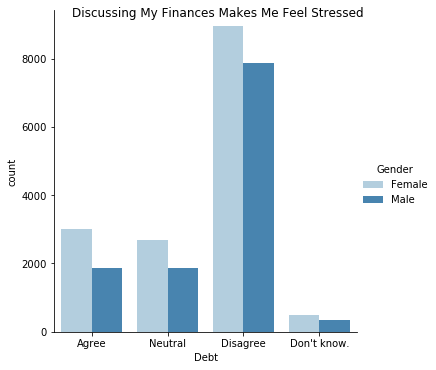

In [22]:
# create a clean column with labels
def financial_stress(score):
    if score <= 3:
        return 'Disagree'
    elif score == 4:
        return 'Neutral'
    elif score <= 7:
        return "Agree"
    else:
        return "Don't know."
        
df_sbs['Debt'] = df_sbs.apply(lambda x: financial_stress(x['J41_2']),axis=1)

# plot the gender distribution
g2 = sns.catplot(x="Debt", 
            kind="count",
            hue='Gender',
            data=df_sbs,
            palette=("Blues"))
g2.fig.suptitle('Discussing My Finances Makes Me Feel Stressed') 

In [24]:
df_sbs[(df_sbs['Gender'] =='Female')][['Gender','Debt']].value_counts(normalize=True)
df_sbs[(df_sbs['Gender'] =='Male')][['Gender','Debt']].value_counts(normalize=True)

Gender  Debt       
Male    Disagree       0.659083
        Agree          0.156825
        Neutral        0.155320
        Don't know.    0.028772
dtype: float64

Text(0.5, 0.98, 'Discussing My Finances Makes Me Feel Stressed')

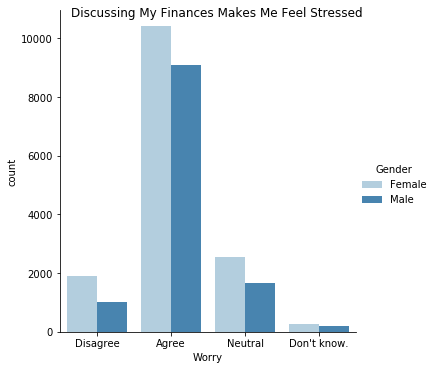

In [17]:
# create a clean column with labels
def financial_stress(score):
    if score <= 3:
        return 'Disagree'
    elif score == 4:
        return 'Neutral'
    elif score <= 7:
        return "Agree"
    else:
        return "Don't know."
        
df_sbs['Worry'] = df_sbs.apply(lambda x: financial_stress(x['B40']),axis=1)

# plot the gender distribution
g2 = sns.catplot(x="Worry", 
            kind="count",
            hue='Gender',
            data=df_sbs,
            palette=("Blues"))
g2.fig.suptitle('Discussing My Finances Makes Me Feel Stressed') 

Text(0.5, 0.98, 'Discussing My Finances Makes Me Feel Stressed')

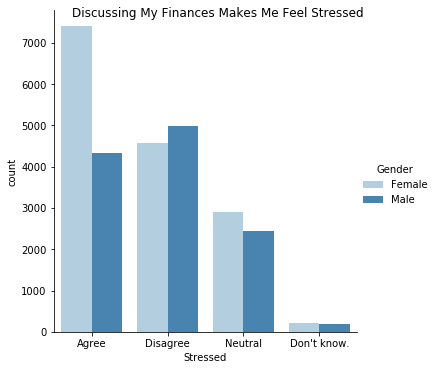

In [12]:
# create a clean column with labels
def financial_stress(score):
    if score <= 3:
        return 'Disagree'
    elif score == 4:
        return 'Neutral'
    elif score <= 7:
        return "Agree"
    else:
        return "Don't know."
        
df_sbs['Stressed'] = df_sbs.apply(lambda x: financial_stress(x['J33_41']),axis=1)

# plot the gender distribution
g2 = sns.catplot(x="Stressed", 
            kind="count",
            hue='Gender',
            data=df_sbs,
            palette=("Blues"))
g2.fig.suptitle('Discussing My Finances Makes Me Feel Stressed') # can also get the figure from plt.gcf()

Text(0.5, 0.98, 'Who knows about investing?')

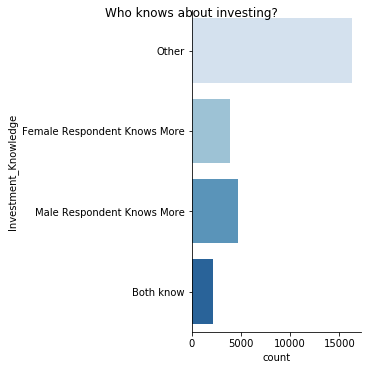

In [81]:
# create a clean column with labels
def set_knowledge(gender, knower):
    if gender == 'Female' and knower in ('1'):
        return 'Female Respondent Knows More'
    if gender == 'Male' and knower in ('1'):
        return 'Male Respondent Knows More'
    if gender == 'Male' and knower in ('3'):
        return 'Both know'
    else:
        return 'Other'
        
df_sbs['Investment_Knowledge'] = df_sbs.apply(lambda x: set_knowledge(x['Gender'], x['A14']),axis=1)


g3 = sns.catplot(y="Investment_Knowledge", 
            kind="count",
            data=df_sbs,
            palette=("Blues"))
g3.fig.suptitle('Who knows about investing?')

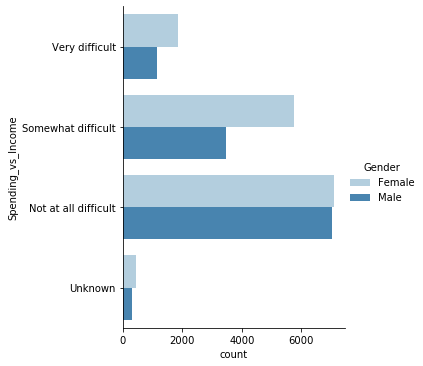

In [84]:
# create a clean column with labels
def set_spending(score):
    switcher = {
        1: "Very difficult",
        2: "Somewhat difficult",
        3: "Not at all difficult",
        98: "Unknown",
        99: "Unknown"
    }
    return switcher.get(score, "Unknown")
        
df_sbs['Spending_vs_Income'] = df_sbs.apply(lambda x: set_spending(x['J4']),axis=1)

# plot the gender distribution
sns.catplot(y="Spending_vs_Income", 
            kind="count", 
            data=df_sbs,
            hue="Gender",
            palette=("Blues"))

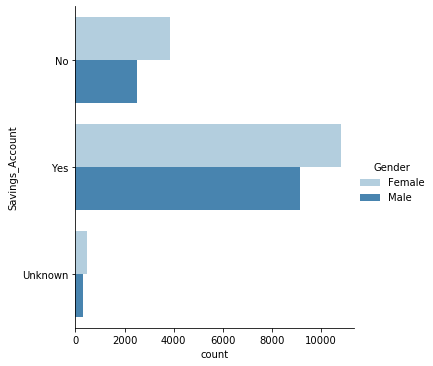

In [86]:
# create a clean column with labels
def set_savings_account(score):
    switcher = {
        1: "Yes",
        2: "No",
        98: "Unknown",
        99: "Unknown"
    }
    return switcher.get(score, "Unknown")
        
df_sbs['Savings_Account'] = df_sbs.apply(lambda x: set_savings_account(x['B2']),axis=1)

# plot the gender distribution
sns.catplot(y="Savings_Account", 
            kind="count", 
            data=df_sbs,
            hue="Gender",
            palette=("Blues"))

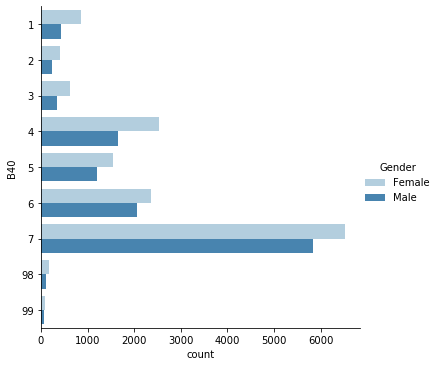

In [87]:
# plot the gender distribution
sns.catplot(y="B40", 
            kind="count", 
            data=df_sbs,
            hue="Gender",
            palette=("Blues"))

In [49]:
df_sbs[df_sbs.Hold_Investment_Account.eq('Yes')]

,NFCSID,STATEQ,CENSUSDIV,CENSUSREG,A3,A3Ar_w,A3B,A4A_new_w,A5_2015,A6,...,M8,M31,M9,M10,wgt_n2,wgt_d2,wgt_s3,Income_Category,Gender,Hold_Investment_Account
0,2018010001,48,9,4,2,5,11,1,5,4,...,98,98,98,1,0.683683,0.519642,1.095189,"Less than \$15,000",Female,Yes
1,2018010002,10,5,3,2,2,8,1,6,1,...,98,3,1,98,0.808358,2.516841,0.922693,"At least \$50,000 but less than \$75,000",Female,Yes
2,2018010003,44,7,3,2,2,8,1,6,1,...,98,98,1,98,1.021551,1.896192,0.671093,"At least \$35,000 but less than \$50,000",Female,Yes
4,2018010005,13,8,4,1,2,2,1,6,1,...,98,2,1,98,0.448075,0.614733,1.232221,"At least \$25,000 but less than \$35,000",Male,Yes
6,2018010007,11,5,3,1,2,2,1,3,1,...,1,1,1,1,1.433500,1.479585,1.020436,"At least \$75,000 but less than \$100,000",Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27083,2018037084,51,8,4,2,3,9,1,7,1,...,98,2,1,2,0.320832,0.139948,0.378946,"At least \$35,000 but less than \$50,000",Female,Yes
27084,2018037085,51,8,4,1,3,3,2,6,1,...,98,2,1,2,0.362876,0.201605,0.912486,"At least \$100,000 but less than \$150,000",Male,Yes
27085,2018037086,51,8,4,2,3,9,2,4,1,...,1,3,1,2,0.781515,0.223292,1.075179,"At least \$75,000 but less than \$100,000",Female,Yes
27086,2018037087,51,8,4,2,3,9,1,2,1,...,1,1,1,2,0.404002,0.183442,0.808332,"At least \$35,000 but less than \$50,000",Female,Yes


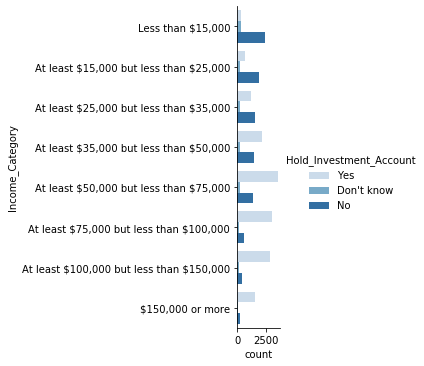

In [59]:
# plot the gender distribution
sns.catplot(y="Income_Category", 
            kind="count", 
            data=df_sbs.sort_values(['A8']),
            hue="Hold_Investment_Account",
            palette=("Blues"))

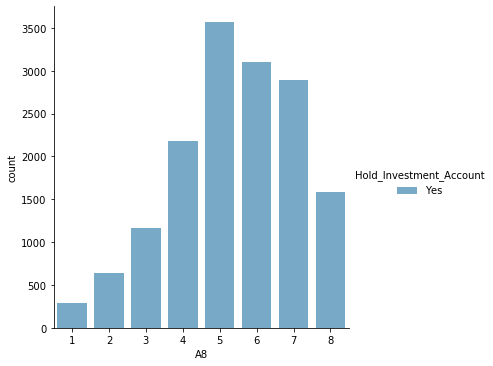

In [52]:
# plot the gender distribution
sns.catplot(x="A8", 
            kind="count", 
            data=df_sbs[df_sbs.Hold_Investment_Account.eq('Yes')].sort_values(['A8']),
            hue="Hold_Investment_Account",
            palette=("Blues"))

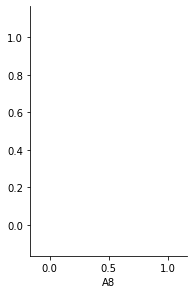

In [57]:
sns.relplot(
    data=df_sbs[df_sbs.Hold_Investment_Account.eq('Yes')].sort_values(['A8']),
    x="A8",

    height=4, aspect=.7, kind="line"
)

Text(0.5, 0.98, 'Do you hold an investment account?')

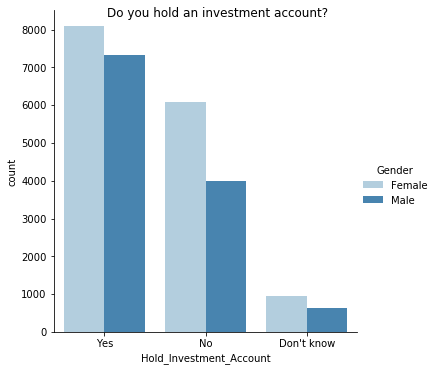

In [25]:
# who has access to an investment account

# create a clean column with labels
def investment_accounts(score):
    if score == 1:
        return 'Yes'
    elif score == 2:
        return 'No'
    else:
        return "Don't know"
        
df_sbs['Hold_Investment_Account'] = df_sbs.apply(lambda x: investment_accounts(x['C1_2012']),axis=1)

# plot the gender distribution
g3 = sns.catplot(x="Hold_Investment_Account", 
            kind="count",
            hue='Gender',
            data=df_sbs,
            order=["Yes", "No", "Don't know"],
            palette=("Blues"))
g3.fig.suptitle('Do you hold an investment account?')

In [42]:
df_sbs[(df_sbs['Gender'] =='Female')][['Gender','Hold_Investment_Account']].value_counts(normalize=True)

Gender  Hold_Investment_Account
Female  Yes                        0.360645
Male    Yes                        0.326045
Female  No                         0.270472
        Don't know                 0.042837
dtype: float64

In [30]:
# what percentage of female respondents hold investment accounts?
df_sbs[['Gender','Hold_Investment_Account']].value_counts(normalize=True)

Gender  Hold_Investment_Account
Female  Yes                        0.298955
Male    Yes                        0.270274
Female  No                         0.224207
Male    No                         0.147466
Female  Don't know                 0.035510
Male    Don't know                 0.023587
dtype: float64

In [20]:
# what percentage of female respondents hold investment accounts?
df_sbs[['Gender','Hold_Investment_Account']].value_counts(normalize=False)

Gender  Hold_Investment_Account
Female  Yes                        21189
        Don't know                 20778
Male    Yes                        18913
        Don't know                 17657
Female  No                         17544
Male    No                         12229
dtype: int64

In [31]:
#df_sbs.groupby('Gender').Hold_Investment_Account.mean()
df_sbs.groupby('Gender').Hold_Investment_Account.count()

Gender
Female    15135
Male      11956
Name: Hold_Investment_Account, dtype: int64

In [24]:
df_sbs.groupby('Gender').NFCSID.nunique()

Gender
Female    59511
Male      48799
Name: NFCSID, dtype: int64

In [ ]:
%%timeit
df_sbs.groupby('Gender').sales_factor.mean()
df_sbs.groupby('Gender').sales_factor.count()
df_sbs.groupby('Gender').id.first()
3.05 ms ± 65.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
%%timeit
df.groupby("city").agg({"sales_factor": ["mean", "count"], "id": "first"})
4.5 ms ± 131 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)